# Data Engineering Project | August 2022 | Victims Dataset
## Data Visualization Notebook

### Import packages

In [94]:
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import dates as mpl_dates

### Load CSV data

In [95]:
acc_deaths_df = pd.read_csv('../output/all_victims_2021_to_date.csv', header=0, index_col=0)
acc_deaths_df.name = 'All Victims 2021 To Date'

### Prepare Dataframe

In [96]:
acc_deaths_df['Incident Date'] = pd.to_datetime(acc_deaths_df['Incident Date'])
acc_deaths_df.sort_values(by='Incident Date', ascending=True, inplace=True)

### Prepare data

In [97]:
# Obtain vector and DF that indicates what events involve gun "accidents"
gun_v = acc_deaths_df['Mass Shooting']
gun_df = acc_deaths_df[gun_v]

In [98]:
# Obtain vector and DF that indicates what events involve children
children_v = acc_deaths_df['Children Involved']
children_df = acc_deaths_df[children_v]

In [99]:
# Obtain vector and DF that indicates what events involve teens
teens_v = acc_deaths_df['Teens Involved']
teens_df = acc_deaths_df[teens_v]

In [100]:
# Obtain vector that indicates the children and teens involved in accidents
children_teens_vector = children_v | teens_v

In [101]:
children_teens_vector.value_counts()

True     7710
False    2258
dtype: int64

In [102]:
# Obtain vector that indicates the mass shooting events
ms_vector = acc_deaths_df['Mass Shooting']

In [103]:
ms_vector.value_counts()

False    8991
True      977
Name: Mass Shooting, dtype: int64

In [104]:
# Obtain vector with the final list of elements that match the criteria
final_vector = children_teens_vector & ms_vector

In [105]:
final_vector.value_counts()

False    9657
True      311
dtype: int64

In [106]:
# Obtain data of the victims of mass shootings that are considered to be children or teens
ms_vics_child_teens_df = acc_deaths_df[final_vector]

In [107]:
ms_vics_child_teens_df.head(5)

,Incident ID,Incident Date,State,City Or County,Address,# Killed,# Injured,Children Involved,Teens Involved,Accident,Mass Shooting,Year,Quarter,Month,Week,Weekday
1892114,1892114,2021-01-01,Iowa,Sioux City,2637 S Walker St,1.0,4.0,False,True,False,True,2021,1,1,53,4
1893953,1893953,2021-01-03,Oregon,Gresham,NE 181st Ave and NE San Rafael St,0.0,4.0,False,True,False,True,2021,1,1,53,6
1893877,1893877,2021-01-03,California,Santa Barbara,1200 block of Liberty St,2.0,2.0,False,True,False,True,2021,1,1,53,6
1893744,1893744,2021-01-03,Florida,Miami,10525 NW 24th Ave,0.0,8.0,False,True,False,True,2021,1,1,53,6
1894822,1894822,2021-01-04,Louisiana,New Orleans,1600 block of N Galvez St,0.0,4.0,False,True,False,True,2021,1,1,1,0


#### Plot trend of children/teens proportion being injured or killed in mass shooting

In [108]:
plt.rcParams["figure.figsize"] = [14.00, 4.50]
plt.rcParams["figure.autolayout"] = True

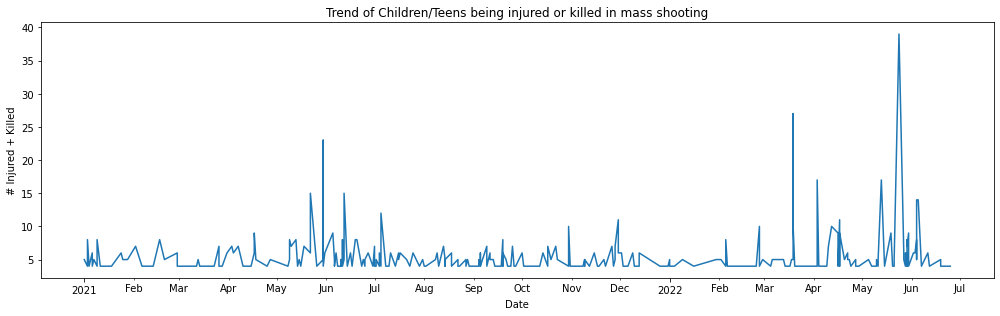

In [109]:
plt.title('Trend of Children/Teens being injured or killed in mass shooting')
plt.xlabel('Date')
plt.ylabel('# Injured + Killed')
ax = plt.gca()
ax.xaxis.set_minor_locator(mpl_dates.MonthLocator())
ax.xaxis.set_minor_formatter(mpl_dates.DateFormatter('%b'))
ax.xaxis.set_major_locator(mpl_dates.YearLocator())
ax.xaxis.set_major_formatter(mpl_dates.DateFormatter('%Y'))
plt.plot(ms_vics_child_teens_df['Incident Date'], ms_vics_child_teens_df['# Killed'] + ms_vics_child_teens_df['# Injured'])

#### Plot trend of gun accidents

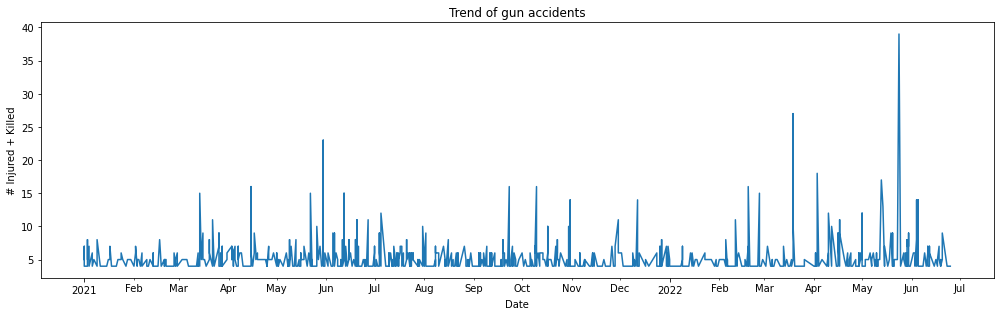

In [110]:
plt.title('Trend of gun accidents')
plt.xlabel('Date')
plt.ylabel('# Injured + Killed')
ax = plt.gca()
ax.xaxis.set_minor_locator(mpl_dates.MonthLocator())
ax.xaxis.set_minor_formatter(mpl_dates.DateFormatter('%b'))
ax.xaxis.set_major_locator(mpl_dates.YearLocator())
ax.xaxis.set_major_formatter(mpl_dates.DateFormatter('%Y'))
plt.plot(gun_df['Incident Date'], gun_df['# Killed'] + gun_df['# Injured'])